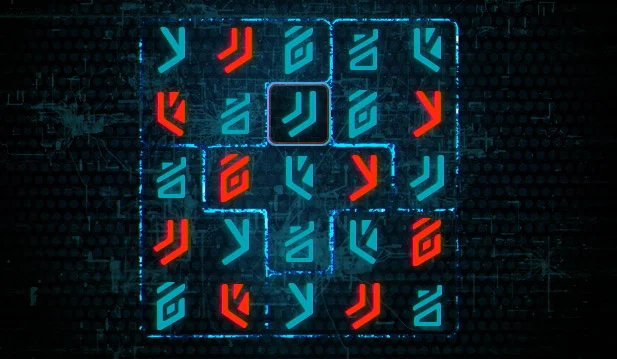

In [43]:
from z3 import *

Create the array necessary for holding the grid you can change size of the grid using `grid_size`

In [44]:
grid_size = 5
X = [[Int('x_%s_%s'%(i+1, j+1)) for j in range(grid_size)] for i in range(grid_size)]
s = Solver()

In [45]:
cells_limit = [ And(X[i][j] > 0 , X[i][j] <= grid_size)  for i in range(grid_size) for j in range(grid_size)]
rows_distinct = [ Distinct(X[i]) for i in range(grid_size) ]
cols_distinct = [ Distinct([X[i][j] for i in range(grid_size)]) for j in range(grid_size)]

puzzle_c = cells_limit + rows_distinct + cols_distinct

Set the pre-existing values in the grid


In [46]:
instance = (
    (0,0,0,0,0),
    (0,0,0,0,0),
    (0,0,0,0,0),
    (0,0,0,0,0),
    (0,0,0,0,0)
)

So this is where we are setting all the matrix values to true incase its a value we need to find. And the evaluate function somehow finds the numeric value.

In [47]:
instance_c = [ If(instance[i][j] == 0, True, X[i][j] == instance[i][j]) for i in range(grid_size) for j in range(grid_size)]
s.add(puzzle_c + instance_c)
s.check()

sat

In [48]:
m = s.model()
r = [ [ m.evaluate(X[i][j]) for j in range(grid_size) ] for i in range(grid_size) ]
print_matrix(r)

[[2, 5, 4, 3, 1],
 [3, 1, 5, 4, 2],
 [4, 2, 1, 5, 3],
 [5, 3, 2, 1, 4],
 [1, 4, 3, 2, 5]]


In [49]:
for d in m.decls():
    print('%s = %s'%(d.name(), m[d]))

x_2_2 = 1
x_2_3 = 5
x_1_1 = 2
x_3_1 = 4
x_3_3 = 1
x_1_5 = 1
x_1_3 = 4
x_4_1 = 5
x_3_4 = 5
x_5_5 = 5
x_1_2 = 5
x_3_5 = 3
x_3_2 = 2
x_4_3 = 2
x_5_2 = 4
x_4_2 = 3
x_2_1 = 3
x_1_4 = 3
x_4_5 = 4
x_4_4 = 1
x_5_3 = 3
x_2_5 = 2
x_5_1 = 1
x_5_4 = 2
x_2_4 = 4
